In [0]:
  spark

In [0]:
#create custom session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
spark

In [0]:
#read data from aws s3
ball_by_ball_df = spark.read.format("csv").option("header","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")
     

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NONStriker_SK|Fielder_match_SK|Fi

In [0]:
ball_by_ball_df = spark.read.format("csv").option("header","true").option("inferschema","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

In [0]:
#create schema of the data which we are importing from the external source so that it automatically checks if the daat type is correct or not.

# Import types and StructType to define schema
from pyspark.sql.types import (
    StructType, StructField,
    StringType, IntegerType, FloatType, DoubleType,
    BooleanType, DateType,StructType,DecimalType
)

from pyspark.sql.types import *
from pyspark.sql.functions import col, sum, avg, count, when

from pyspark.sql.window import Window

from pyspark.sql.functions import year, month, dayofmonth, when

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])
     

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Match.csv")

     

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player.csv")

     

In [0]:

player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player_match.csv")

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Team.csv")
     

In [0]:
# Filter to include only valid deliveries (excluding extras like wides and no balls for specific analyses)
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs")==0))

# Aggregation: Calculate the total and average runs scored in each match and inning
total_and_avg_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)
#Calculate Strike Rate per Batsman.    #Find top performers and compare consistency across matches.
strike_rate_df = ball_by_ball_df.groupBy("match_id", "striker").agg(
    ( (sum("runs_scored") / count("*")) * 100 ).alias("strike_rate"),
    sum("runs_scored").alias("total_runs"),
    count("*").alias("balls_faced")
)

#Calculate Economy Rate per Bowler.  #Compare bowlers’ efficiency in limiting runs.
economy_rate_df = ball_by_ball_df.groupBy("match_id", "bowler").agg(
    ( (sum("runs_scored") / count("*")) * 6 ).alias("economy_rate"),
    sum("runs_scored").alias("total_runs"),
    count("*").alias("balls_bowled")
)



In [0]:
# Window Function: Calculate running total of runs in each match for each over
windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)


In [0]:
# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
)
     

#Average Runs Per Over.  #Can see which time periods had faster scoring (like momentum increasing).
#It reveals trends — whether the game slowed down or picked up as it progressed.
runs_per_over_df = ball_by_ball_df.groupBy("match_id", "innings_no", "over_id").agg(
    sum("runs_scored").alias("total_runs_per_over"),
    avg("runs_scored").alias("average_runs_per_ball")
)

#Wickets Taken Per Bowler.     
#Shows which players performed best defensively
#You can spot consistent high performers or match-winning players.
wickets_df = ball_by_ball_df.groupBy("match_id", "bowler").agg(
    sum(when(col("wicket_type").isNotNull(), 1).otherwise(0)).alias("wickets_taken")
)


In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show(2)



+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"), "Left-Handed").otherwise("Right-Handed")
)

# Show the modified player DataFrame
player_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|NULL| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2|bb mccullum|NULL|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows


In [0]:
from pyspark.sql.functions import col, when, current_date, year, round

# Categorize veteran status into three tiers
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran")
    .when((col("age_as_on_match") >= 28) & (col("age_as_on_match") < 35), "Experienced")
    .otherwise("Rookie")
)

# Calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    year(current_date()) - col("season_year")
)

# Performance-adjusted experience score: simple combination of age and years since debut
player_match_df = player_match_df.withColumn(
    "experience_score",
    round(col("age_as_on_match") * 0.5 + col("years_since_debut") * 0.5, 2)
)

# Categorize career stage based on years since debut
player_match_df = player_match_df.withColumn(
    "career_stage",
    when(col("years_since_debut") <= 3, "Early Career")
    .when((col("years_since_debut") > 3) & (col("years_since_debut") <= 8), "Mid Career")
    .otherwise("Late Career")
)

# Show the enriched DataFrame
player_match_df.select("player_id", "player_name", "age_as_on_match", "season_year", 
                       "years_since_debut", "experience_score", "veteran_status", "career_stage").show(10)


+---------+-----------+---------------+-----------+-----------------+----------------+--------------+------------+
|player_id|player_name|age_as_on_match|season_year|years_since_debut|experience_score|veteran_status|career_stage|
+---------+-----------+---------------+-----------+-----------------+----------------+--------------+------------+
|       -1|        N/A|           NULL|       NULL|             NULL|            NULL|        Rookie| Late Career|
|        6|   R Dravid|             35|       2008|               17|            26.0|       Veteran| Late Career|
|        7|   W Jaffer|             30|       2008|               17|            23.5|   Experienced| Late Career|
|        8|    V Kohli|             20|       2008|               17|            18.5|        Rookie| Late Career|
|        9|  JH Kallis|             33|       2008|               17|            25.0|   Experienced| Late Career|
|       10|   CL White|             25|       2008|               17|           

In [0]:
from pyspark.sql.functions import col, when, current_date, year, round

# Categorize veteran status into three tiers
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran")
    .when((col("age_as_on_match") >= 28) & (col("age_as_on_match") < 35), "Experienced")
    .otherwise("Rookie")
)

# Calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    year(current_date()) - col("season_year")
)

# Performance-adjusted experience score: simple combination of age and years since debut
player_match_df = player_match_df.withColumn(
    "experience_score",
    round(col("age_as_on_match") * 0.5 + col("years_since_debut") * 0.5, 2)
)

# Categorize career stage based on years since debut
player_match_df = player_match_df.withColumn(
    "career_stage",
    when(col("years_since_debut") <= 3, "Early Career")
    .when((col("years_since_debut") > 3) & (col("years_since_debut") <= 8), "Mid Career")
    .otherwise("Late Career")
)

# Show the enriched DataFrame
player_match_df.select("player_id", "player_name", "age_as_on_match", "season_year", 
                       "years_since_debut", "experience_score", "veteran_status", "career_stage").show(10)


+---------+-----------+---------------+-----------+-----------------+----------------+--------------+------------+
|player_id|player_name|age_as_on_match|season_year|years_since_debut|experience_score|veteran_status|career_stage|
+---------+-----------+---------------+-----------+-----------------+----------------+--------------+------------+
|       -1|        N/A|           NULL|       NULL|             NULL|            NULL|        Rookie| Late Career|
|        6|   R Dravid|             35|       2008|               17|            26.0|       Veteran| Late Career|
|        7|   W Jaffer|             30|       2008|               17|            23.5|   Experienced| Late Career|
|        8|    V Kohli|             20|       2008|               17|            18.5|        Rookie| Late Career|
|        9|  JH Kallis|             33|       2008|               17|            25.0|   Experienced| Late Career|
|       10|   CL White|             25|       2008|               17|           

In [0]:
#Creates temporary SQL views for all your main datasets (ball_by_ball, match, player, player_match, team) so you can use Spark SQL for analysis.
#Checks the column names of ball_by_ball_df.
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

# Show columns of ball_by_ball_df
ball_by_ball_df.columns


['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk',
 'running_total_runs',
 'high_impact']

In [0]:
# Run the SQL query inside spark.sql()
top_scoring_batsmen_per_season = spark.sql("""
WITH player_season_stats AS (
    SELECT 
        p.player_name,
        m.season_year,
        SUM(b.runs_scored) AS total_runs,
        COUNT(b.ball_id) AS balls_faced,
        COUNT(DISTINCT m.match_id) AS matches_played,
        SUM(CASE WHEN b.runs_scored >= 50 THEN 1 ELSE 0 END) AS fifties_count
    FROM ball_by_ball b
    JOIN match m ON b.match_id = m.match_id   
    JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
    JOIN player p ON p.player_id = pm.player_id
    GROUP BY p.player_name, m.season_year
),
ranked_players AS (
    SELECT *,
        ROW_NUMBER() OVER (PARTITION BY season_year ORDER BY total_runs DESC) AS season_rank,
        ROUND(total_runs*100.0/balls_faced, 2) AS strike_rate,
        ROUND(total_runs*1.0/matches_played, 2) AS avg_runs_per_match
    FROM player_season_stats
)
SELECT *
FROM ranked_players
WHERE season_rank <= 3
ORDER BY season_year, season_rank
""")

top_scoring_batsmen_per_season.show()

#Compute season-wise stats per player – Aggregate total runs, balls faced, matches played, and fifties using a WITH clause (player_season_stats).

#Rank and enrich players – Use ROW_NUMBER() to rank top performers per season and calculate strike rate and average runs per match (ranked_players).



+--------------+-----------+----------+-----------+--------------+-------------+-----------+-----------+------------------+
|   player_name|season_year|total_runs|balls_faced|matches_played|fifties_count|season_rank|strike_rate|avg_runs_per_match|
+--------------+-----------+----------+-----------+--------------+-------------+-----------+-----------+------------------+
|      se marsh|       2008|       614|        440|            11|            0|          1|     139.55|             55.82|
|     g gambhir|       2008|       532|        378|            14|            0|          2|     140.74|             38.00|
| st jayasuriya|       2008|       508|        308|            14|            0|          3|     164.94|             36.29|
|     ml hayden|       2009|       571|        393|            12|            0|          1|     145.29|             47.58|
|  ac gilchrist|       2009|       486|        322|            16|            0|          2|     150.93|             30.38|
|ab de v

In [0]:

#This query identifies the bowlers who gave away the fewest runs per ball in the powerplay and also shows how many wickets they took, so you can spot the best economical bowlers early in the innings.
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|     sm harwood|0.3333333333333333|            0|
|     avesh khan|               0.5|            0|
|        a zampa|               0.5|            0|
|      gr napier|               0.5|            0|
|       aj finch|               0.5|            0|
|     ankit soni|               0.5|            0|
|       nb singh|0.5833333333333334|            0|
|     ag murtaza|0.6538461538461539|            0|
|      sb bangar|0.6666666666666666|            0|
|     d du preez|0.6666666666666666|            0|
|        s gopal|0.6666666666666666|            0|
|     fh edwards|0.6923076923076923|            0|
|       a kumble|0.7685185185185185|            0|
|       umar gul|0.7777777777777778|            0|
|   kp pietersen|0.7777777777777778|            0|
|j syed mohammad|0.7777777777777778|            0|
|      ss mundhe|0.833333333333

In [0]:
#Select key match info – Retrieves match_id, toss winner, toss choice (bat/field), and match winner.

#Compute match outcome – Uses a CASE statement to flag if the toss winner also won the match.

#Filter valid tosses – Ignores matches where toss info is missing (toss_name IS NOT NULL).

#Order by match – Makes it easy to see toss outcomes chronologically.

from pyspark.sql.functions import when, col

toss_impact_individual_matches = spark.sql("""
SELECT 
    m.match_id, 
    m.toss_winner, 
    m.toss_name, 
    m.match_winner,
    m.win_margin,
    CASE 
        WHEN m.toss_winner = m.match_winner THEN 'Won' 
        ELSE 'Lost' 
    END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")

# Add toss advantage: whether winning the toss and choosing to bat first leads to a high-margin win
toss_impact_individual_matches = toss_impact_individual_matches.withColumn(
    "toss_advantage",
    when((col("match_outcome") == "Won") & (col("toss_name") == "bat") & (col("win_margin") >= 50), "High Advantage")
    .when((col("match_outcome") == "Won") & (col("toss_name") == "bat") & (col("win_margin") < 50), "Moderate Advantage")
    .otherwise("No Advantage")
)

toss_impact_individual_matches.show(5)


+--------+--------------------+---------+--------------------+----------+-------------+------------------+
|match_id|         toss_winner|toss_name|        match_winner|win_margin|match_outcome|    toss_advantage|
+--------+--------------------+---------+--------------------+----------+-------------+------------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|       140|         Lost|      No Advantage|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|        33|          Won|Moderate Advantage|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         9|         Lost|      No Advantage|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         5|         Lost|      No Advantage|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         5|         Lost|      No Advantage|
+--------+--------------------+---------+--------------------+----------+-------------+------------------+
only showing top 5 rows


In [0]:
#Join datasets – Combines ball-by-ball, player, player-match, and match info to align runs with match outcome and player.
#Filter winning innings – Only considers innings where the player’s team won the match (m.match_winner = pm.player_team).
#Compute averages – Calculates the average runs scored per player in winning matches.
#Count innings played – Tracks how many innings each player contributed to a win.
#Order results – Sorts players by their average runs in wins to identify consistently impactful performers.

from pyspark.sql.functions import when, col, avg, count

average_runs_in_wins = spark.sql("""
SELECT 
    p.player_name, 
    AVG(b.runs_scored) AS avg_runs_in_wins, 
    COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
""")

# Add a column to flag high-impact innings (>50 runs in a winning match)
average_runs_in_wins = average_runs_in_wins.withColumn(
    "high_impact_batsman",
    when(col("avg_runs_in_wins") >= 50, "Yes").otherwise("No")
)

average_runs_in_wins.show(5)


+-------------+------------------+--------------+-------------------+
|  player_name|  avg_runs_in_wins|innings_played|high_impact_batsman|
+-------------+------------------+--------------+-------------------+
|  rashid khan|               6.0|             1|                 No|
|shahid afridi|3.3333333333333335|             6|                 No|
|     ba bhatt|               3.0|             2|                 No|
|     an ahmed|               3.0|             3|                 No|
|      sn khan|2.5789473684210527|            19|                 No|
+-------------+------------------+--------------+-------------------+
only showing top 5 rows


In [0]:
import matplotlib.pyplot as plt
import numpy as np


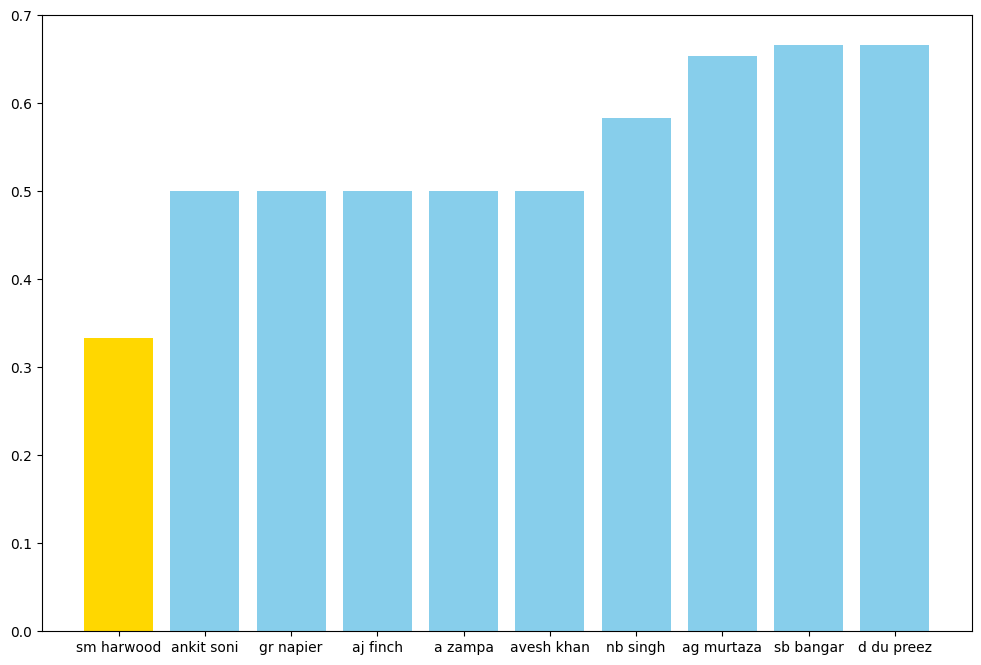

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File /databricks/python/lib/python3.12/site-packages/pandas/core/indexes/base.py:3805, in Index.get_loc(self, key)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
   3806 except KeyError as err:

File index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas/_libs/hashtable_class_helper.pxi:7081, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas/_libs/hashtable_class_helper.pxi:7089, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'wickets'

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
File <command-7712368908046782>, line 16
     10 bars = plt.bar(
     11     top_economical_bowlers['player_name'],
     12 

In [0]:

# Assuming 'economical_bowlers_powerplay' has columns: 'player_name', 'avg_runs_per_ball', 'wickets'
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Top 10 bowlers by economy
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')

# Color: highlight the best bowler
colors = ['gold' if i == 0 else 'skyblue' for i in range(len(top_economical_bowlers))]
plt.figure(figsize=(12, 8))
bars = plt.bar(
    top_economical_bowlers['player_name'],
    top_economical_bowlers['avg_runs_per_ball'],
    color=colors
)
# Add wickets as text on bars
for bar, wickets in zip(bars, top_economical_bowlers['wickets']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'W:{wickets}', ha='center', va='bottom')

plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


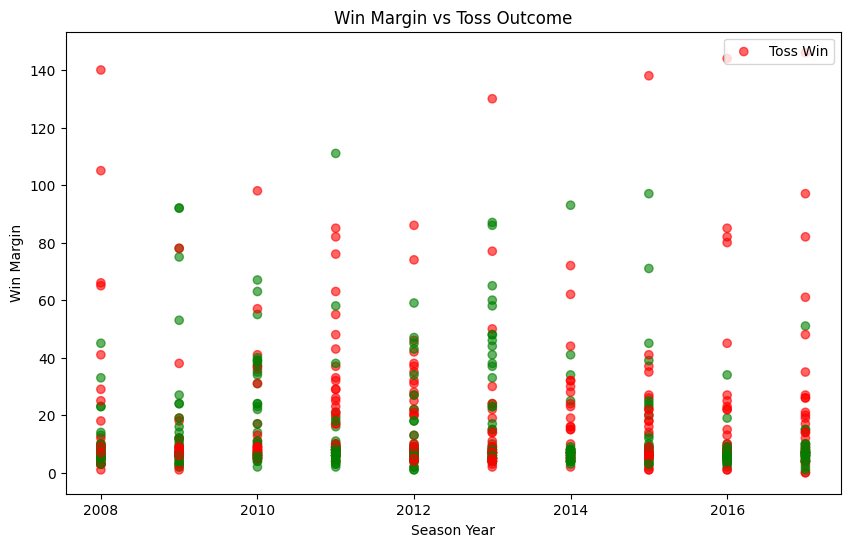

In [0]:
# Assuming 'match_df' has columns: 'win_margin', 'toss_match_winner'
match_pd = match_df.toPandas()

colors = match_pd['toss_match_winner'].map({'Yes':'green','No':'red'})

plt.figure(figsize=(10,6))
plt.scatter(match_pd['season_year'], match_pd['win_margin'], c=colors, alpha=0.6)
plt.xlabel('Season Year')
plt.ylabel('Win Margin')
plt.title('Win Margin vs Toss Outcome')
plt.legend(['Toss Win', 'Toss Loss'], loc='upper right')
plt.show()



In [0]:
import seaborn as sns

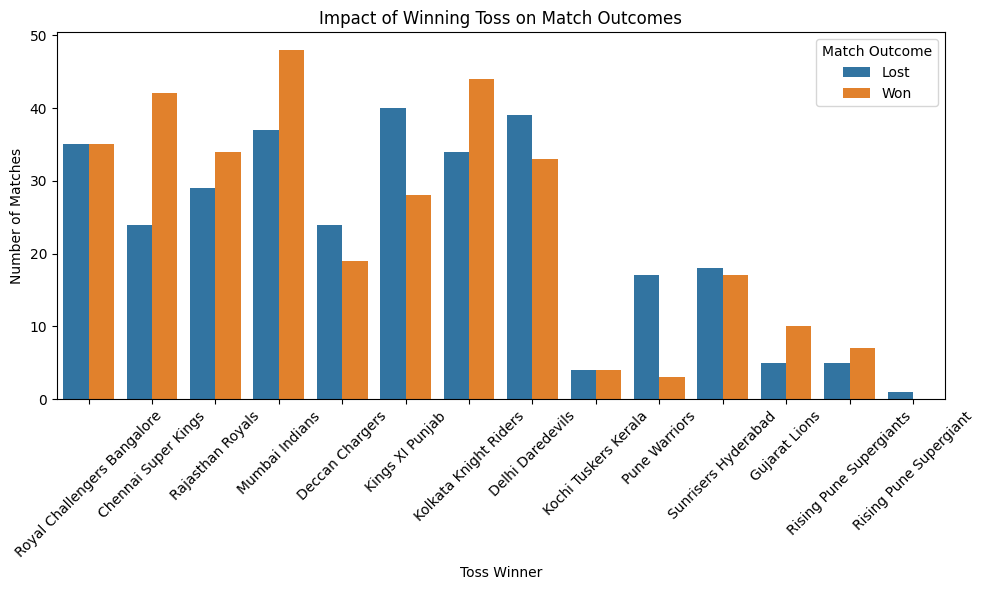

In [0]:
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/spark-b21ee8ea-b5ed-4546-a226-d5/.ipykernel/2493/command-7712368908046786-1623056128:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


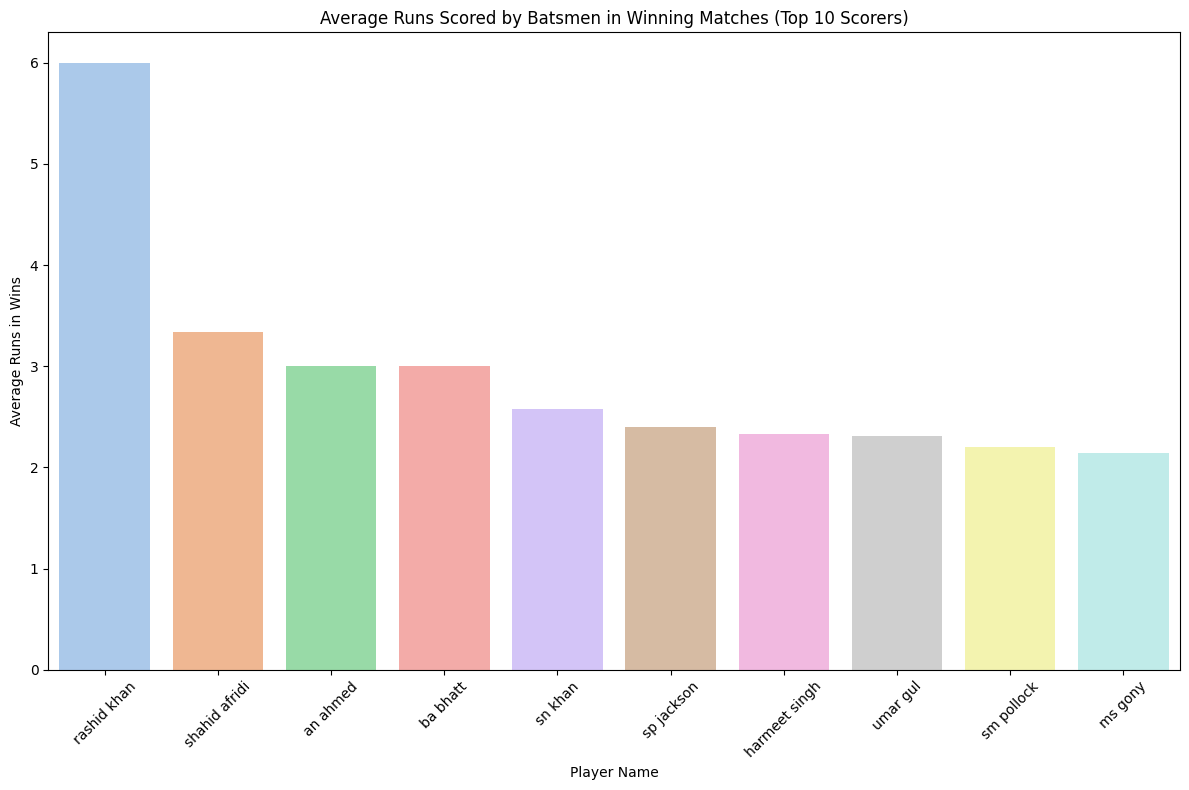

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')

# Using a different color palette (pastel colors)
sns.barplot(
    x='player_name', 
    y='avg_runs_in_wins', 
    data=top_scorers, 
    palette=sns.color_palette("pastel", 10)  # pastel palette with 10 colors
)

plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





In [0]:
# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")


/home/spark-b21ee8ea-b5ed-4546-a226-d5/.ipykernel/2493/command-7712368908046788-3593142348:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


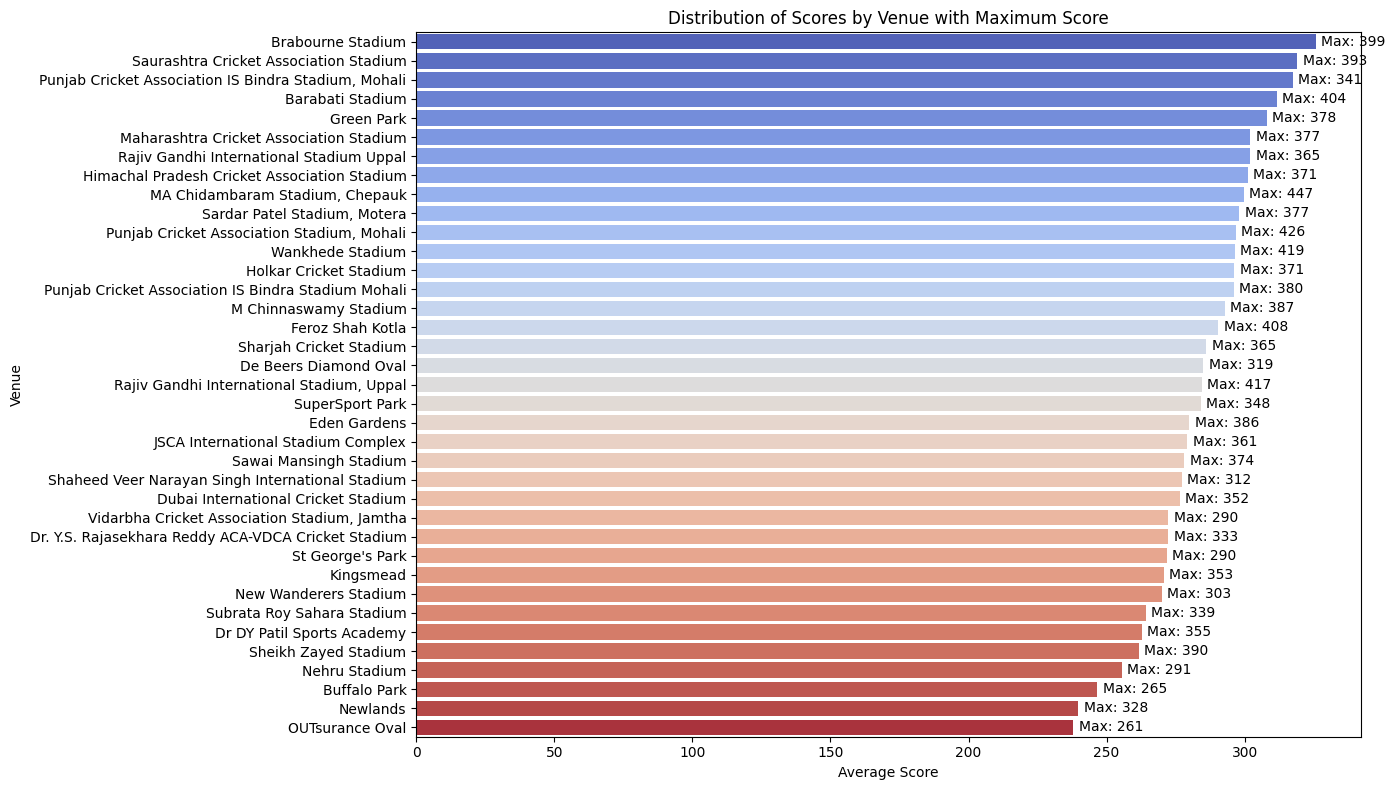

In [0]:
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Sort venues by average score
scores_by_venue_pd = scores_by_venue_pd.sort_values('average_score', ascending=False)

# Plot with color gradient based on average score
plt.figure(figsize=(14, 8))
sns.barplot(
    x='average_score', 
    y='venue_name', 
    data=scores_by_venue_pd, 
    palette=sns.color_palette("coolwarm", len(scores_by_venue_pd))
)

# Overlay highest score as annotations
for index, row in scores_by_venue_pd.iterrows():
    plt.text(row['average_score'] + 2, index, f"Max: {int(row['highest_score'])}", va='center')

plt.title('Distribution of Scores by Venue with Maximum Score')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()


In [0]:
# Execute SQL Query to get dismissal counts
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")

/home/spark-b21ee8ea-b5ed-4546-a226-d5/.ipykernel/2493/command-7712368908046790-1453570368:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


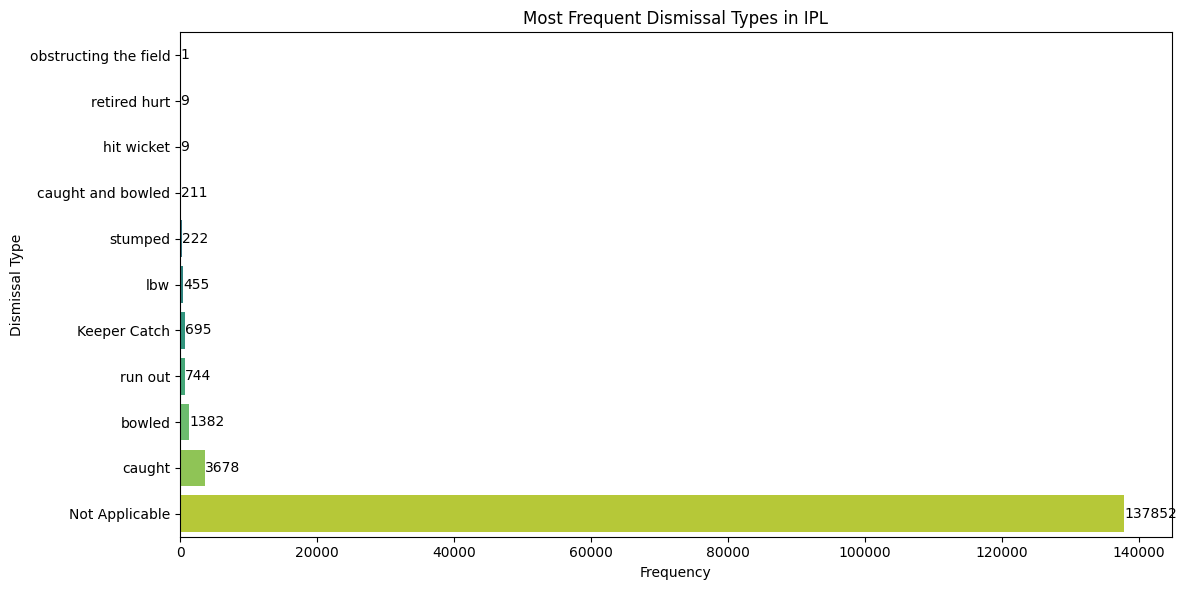

In [0]:
# Convert Spark DataFrame to Pandas
dismissal_types_pd = dismissal_types.toPandas()

# Sort by frequency for better visualization
dismissal_types_pd = dismissal_types_pd.sort_values('frequency', ascending=True)

# Plot with enhanced visual features
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x='frequency', 
    y='out_type', 
    data=dismissal_types_pd, 
    palette=sns.color_palette("viridis", len(dismissal_types_pd))
)

# Add frequency labels on bars
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, int(width), va='center')

plt.title('Most Frequent Dismissal Types in IPL')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.tight_layout()
plt.show()



In [0]:
# SQL Query to get total runs per team per season
top_teams_season = spark.sql("""
SELECT pm.player_team AS team, m.season_year, SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
GROUP BY pm.player_team, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

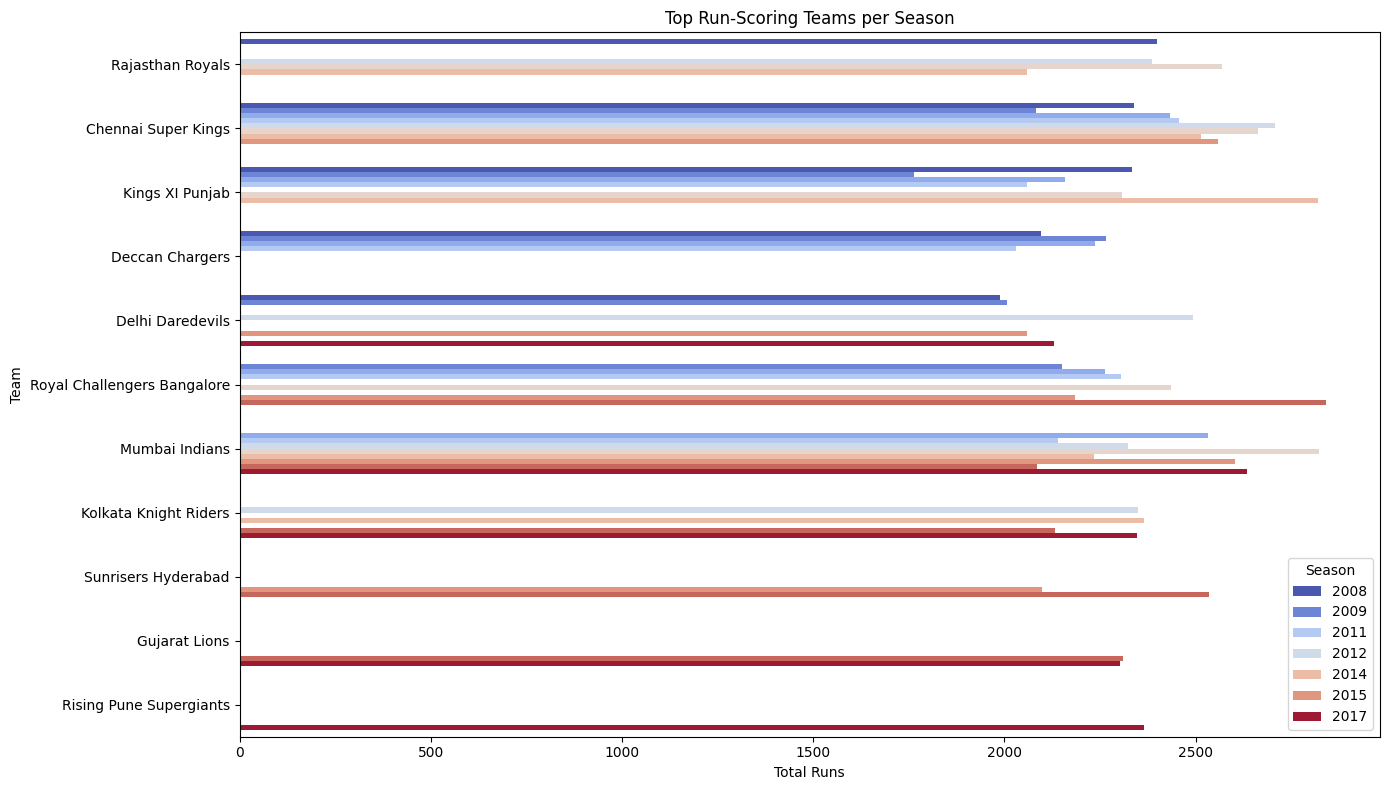

In [0]:
# Convert to Pandas
top_teams_season_pd = top_teams_season.toPandas()

# Filter top 5 teams per season
top_teams_season_pd = top_teams_season_pd.groupby('season_year').head(5)

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='total_runs', 
    y='team', 
    hue='season_year', 
    data=top_teams_season_pd, 
    palette='coolwarm'
)
plt.title('Top Run-Scoring Teams per Season')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

In [0]:
# SQL Query: Total wins and average win margin per team
team_win_margin = spark.sql("""
SELECT 
    CASE 
        WHEN pm.player_team IS NOT NULL THEN pm.player_team
        ELSE 'Unknown'
    END AS team_name,
    COUNT(*) AS total_wins,
    AVG(m.win_margin) AS avg_win_margin
FROM match m
JOIN player_match pm ON m.match_id = pm.match_id
WHERE m.match_winner = pm.player_team
GROUP BY pm.player_team
ORDER BY avg_win_margin DESC
""")


/home/spark-b21ee8ea-b5ed-4546-a226-d5/.ipykernel/2493/command-7712368908046794-2447349301:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


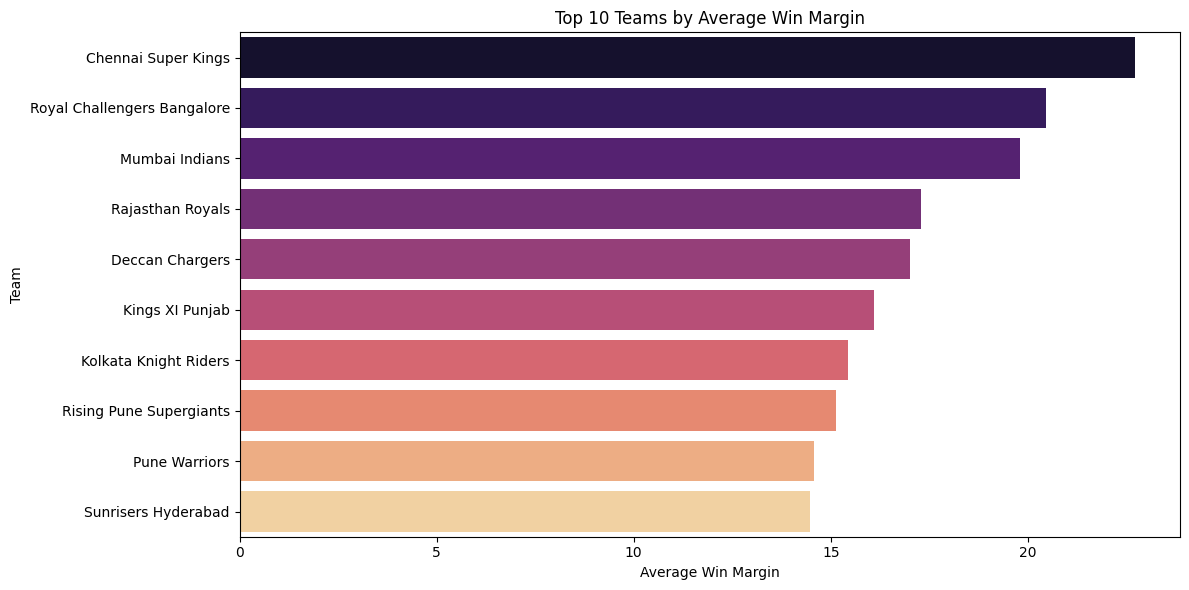

In [0]:

# Convert to Pandas
team_win_margin_pd = team_win_margin.toPandas().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='avg_win_margin', 
    y='team_name', 
    data=team_win_margin_pd, 
    palette='magma'
)
plt.title('Top 10 Teams by Average Win Margin')
plt.xlabel('Average Win Margin')
plt.ylabel('Team')
plt.tight_layout()
plt.show()
